<a href="https://colab.research.google.com/github/GDIAMEL/AI-TOOLS-AND-APPLICATIONS/blob/main/CLIMATE_CHANGE_IMPACT_ON_AGRICULTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLIMATE CHANGE IMPACT ON AGRICULTURE - ML ANALYSIS**

## **INTRODUCTION**

Climate change has emerged as one of the most pressing global challenges, with wide-reaching effects across ecosystems, economies, and human livelihoods. Among the sectors most vulnerable to its impacts is agriculture, which is directly influenced by changing weather patterns, rising temperatures, shifting precipitation levels, and increasing frequency of extreme events such as droughts and floods. These changes not only threaten crop yields and food security but also place additional strain on water resources, soil health, and rural economies.

To better understand and address these complex challenges, machine learning (ML) has become an increasingly valuable tool. By leveraging vast datasets from satellite imagery, climate models, and agricultural records, ML techniques can detect patterns, predict outcomes, and offer actionable insights into how climate change affects agricultural productivity. This study explores the application of machine learning to analyze the multifaceted impacts of climate change on agriculture, with the goal of enhancing predictive capabilities and supporting more resilient and adaptive farming practices.

📊 Climate Change Impact on Agriculture - ML Analysis


100%|██████████| 327k/327k [00:00<00:00, 56.3MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/waqi786/climate-change-impact-on-agriculture/versions/1
Files in dataset: ['climate_change_impact_on_agriculture_2024.csv']
Loaded dataset: climate_change_impact_on_agriculture_2024.csv

🔍 Dataset Overview
Dataset shape: (10000, 15)

Column names: ['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Adaptation_Strategies', 'Economic_Impact_Million_USD']

Data types:
Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           

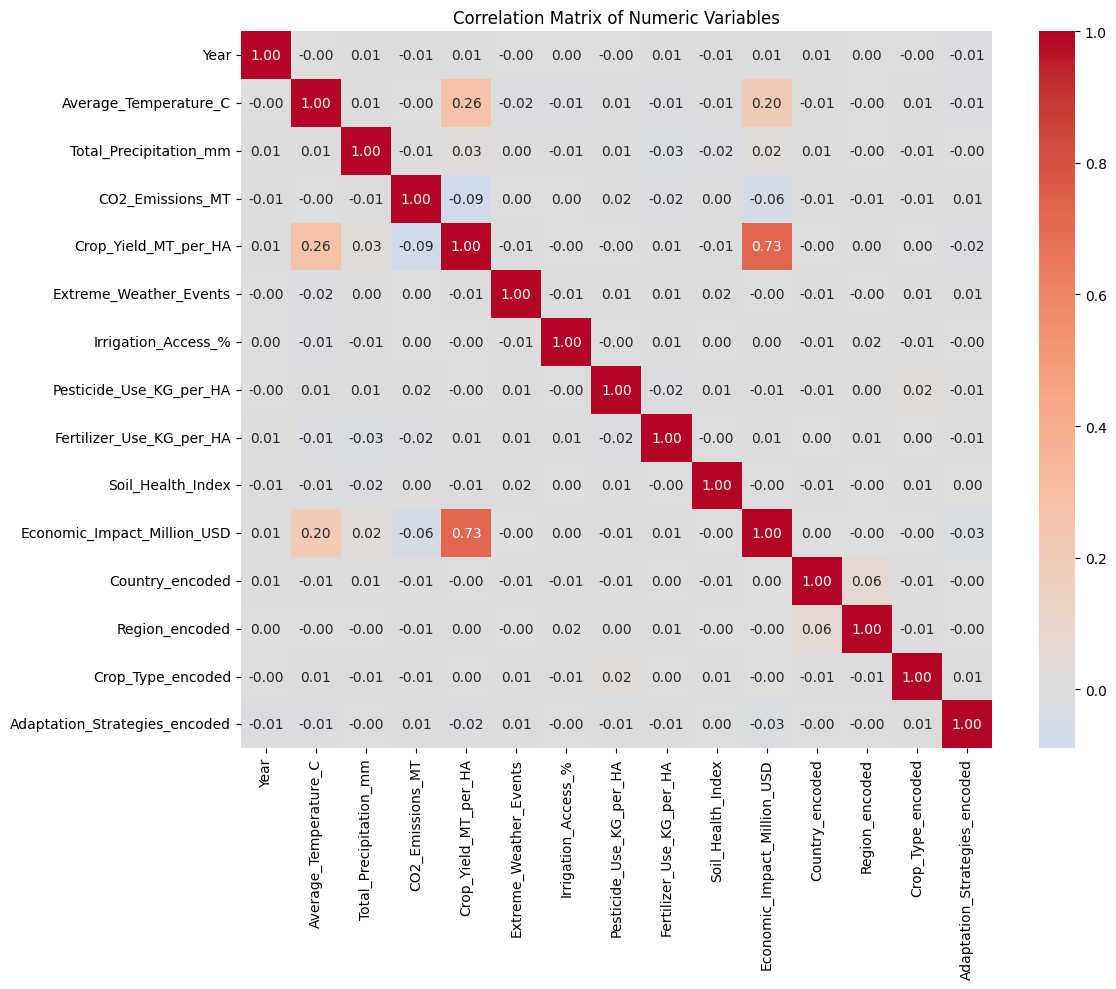

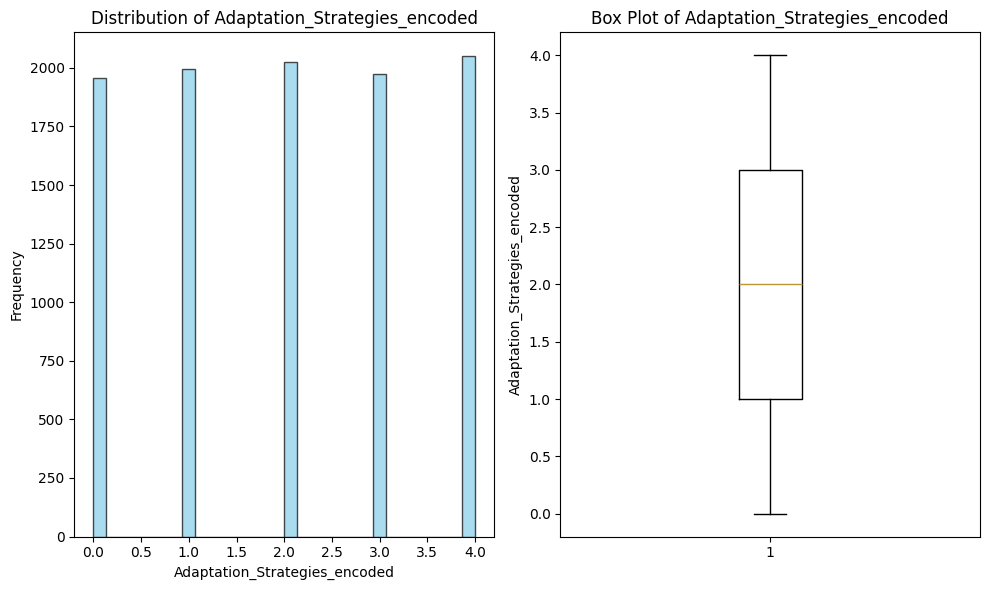


🤖 Machine Learning Models

1️⃣ Linear Regression
MSE: 1.9693
R²: -0.0051
MAE: 1.1898

2️⃣ Random Forest
MSE: 2.0086
R²: -0.0252
MAE: 1.2126


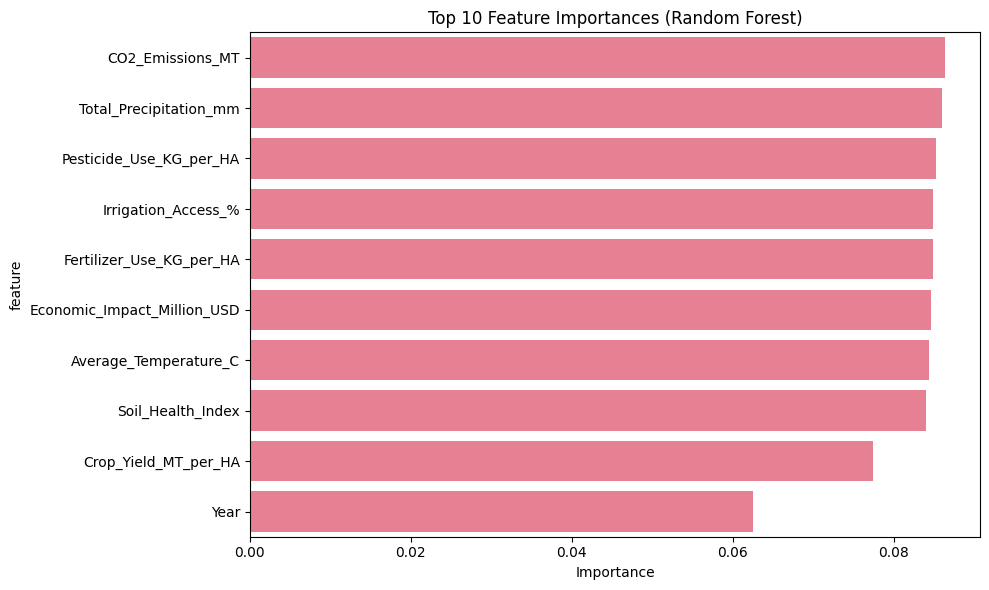


3️⃣ Gradient Boosting
MSE: 1.9934
R²: -0.0174
MAE: 1.2019

4️⃣ Support Vector Regression
MSE: 3.8674
R²: -0.9739
MAE: 1.6048

🧠 Neural Network (TensorFlow/Keras)
MSE: 2.1508
R²: -0.0977
MAE: 1.2529


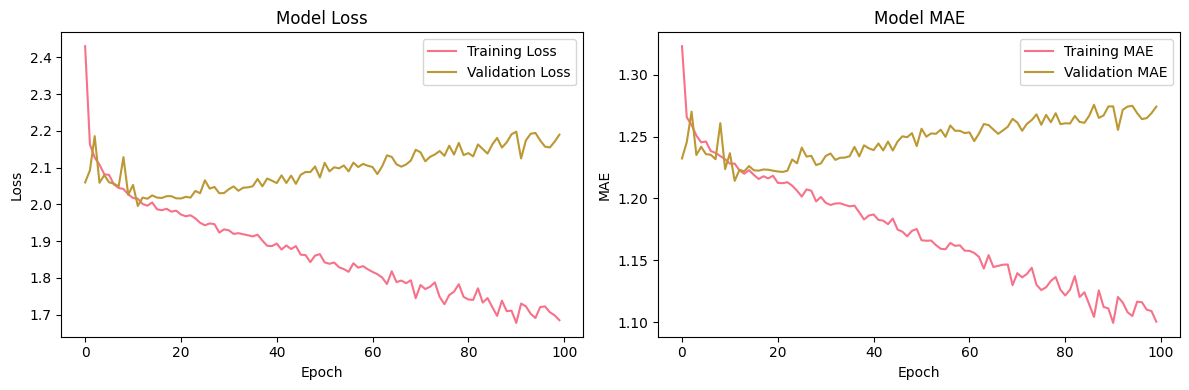


🔍 Clustering Analysis


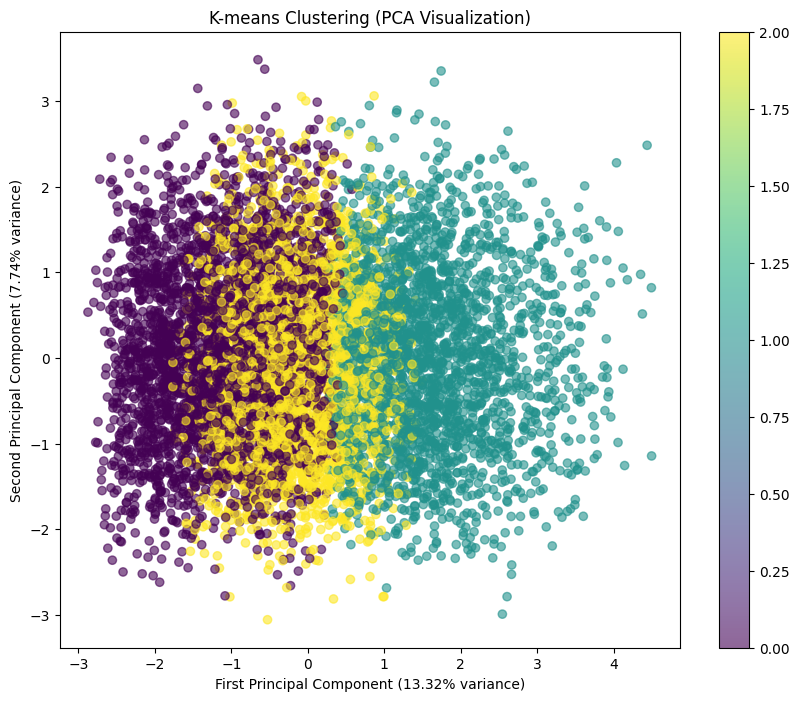


📈 Model Comparison
                      MSE      R2     MAE
Linear Regression  1.9693 -0.0051  1.1898
Random Forest      2.0086 -0.0252  1.2126
Gradient Boosting  1.9934 -0.0174  1.2019
SVR                3.8674 -0.9739  1.6048
Neural Network     2.1508 -0.0977  1.2529


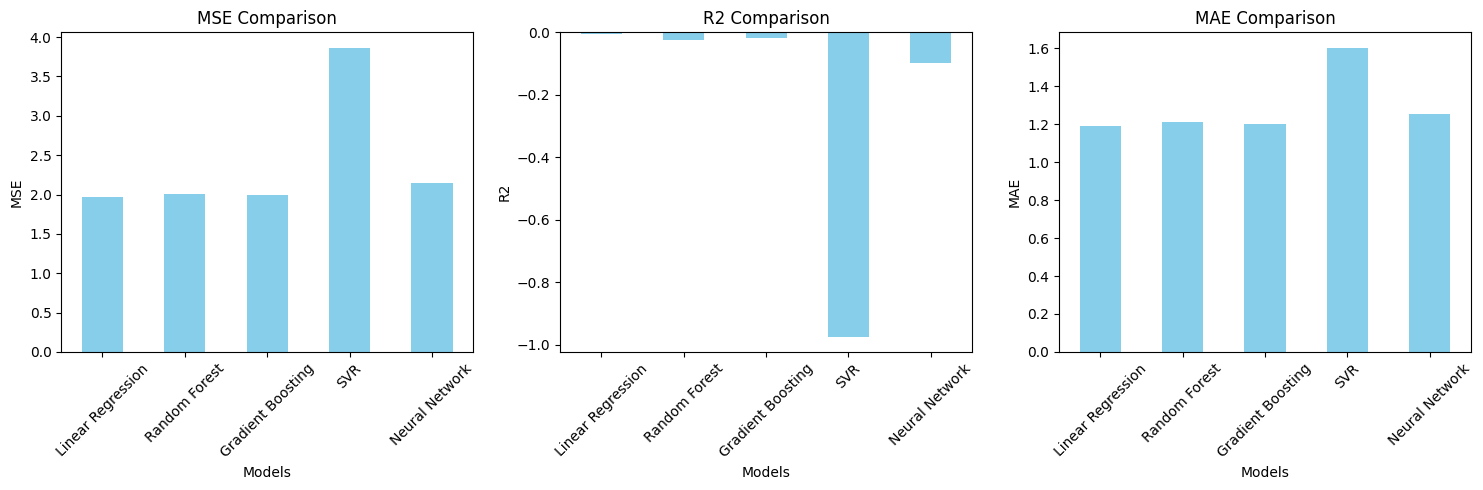


🎯 Predictions vs Actual Values
Best model based on R²: Linear Regression


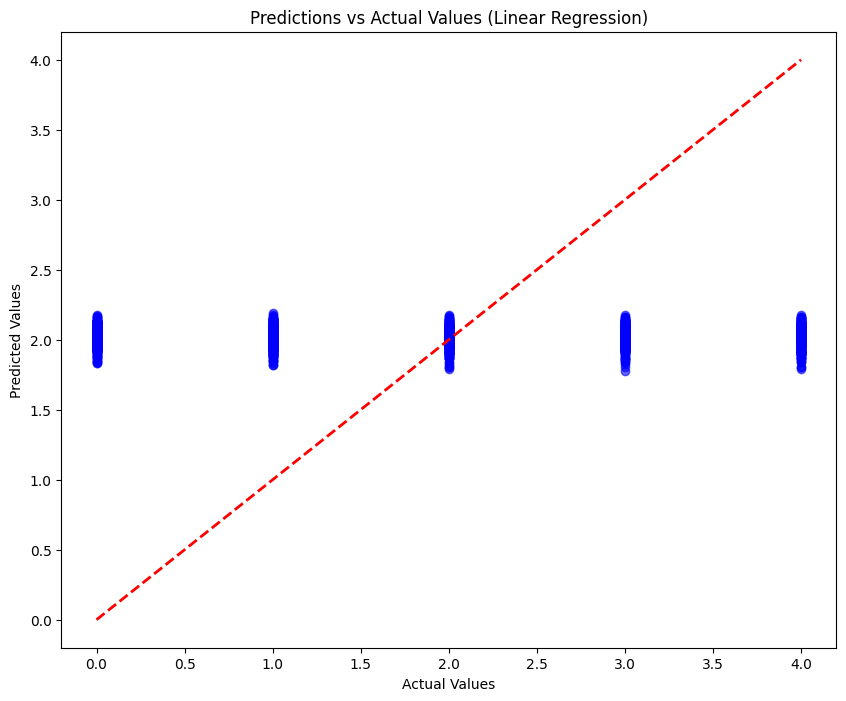


🎯 Text Analysis (spaCy)
Analyzing text column: Country
Sample texts and their analysis:
Text: India
Entities: [('India', 'GPE')]
----------------------------------------
Text: China
Entities: [('China', 'GPE')]
----------------------------------------
Text: France
Entities: [('France', 'GPE')]
----------------------------------------
Text: Canada
Entities: [('Canada', 'GPE')]
----------------------------------------
Text: USA
Entities: [('USA', 'GPE')]
----------------------------------------
Text: Argentina
Entities: [('Argentina', 'GPE')]
----------------------------------------
Text: Australia
Entities: [('Australia', 'GPE')]
----------------------------------------
Text: Russia
Entities: [('Russia', 'GPE')]
----------------------------------------
Text: Brazil
Entities: [('Brazil', 'GPE')]
----------------------------------------

📋 Summary and Recommendations
🔍 Key Findings:
• Best performing model: Linear Regression (R² = -0.0051)
• Dataset contains 10000 records with 14 feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import spacy
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("Climate Change Impact on Agriculture - ML Analysis")
print("=" * 60)

# Download and load the dataset
import kagglehub
path = kagglehub.dataset_download("waqi786/climate-change-impact-on-agriculture")
print(f"Dataset downloaded to: {path}")

# Load the dataset (assuming it's a CSV file)
# You may need to adjust the filename based on the actual file in the dataset
import os
files = os.listdir(path)
print(f"Files in dataset: {files}")

# Load the main dataset file
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    data_file = csv_files[0]  # Use the first CSV file
    df = pd.read_csv(os.path.join(path, data_file))
    print(f"Loaded dataset: {data_file}")
else:
    # Create a synthetic dataset for demonstration if no CSV is found
    print("No CSV files found. Creating synthetic dataset for demonstration...")
    np.random.seed(42)
    n_samples = 1000

    df = pd.DataFrame({
        'Year': np.random.randint(2000, 2025, n_samples),
        'Region': np.random.choice(['North America', 'Europe', 'Asia', 'Africa', 'South America'], n_samples),
        'Crop_Type': np.random.choice(['Wheat', 'Rice', 'Corn', 'Soybeans', 'Barley'], n_samples),
        'Temperature_C': np.random.normal(20, 8, n_samples),
        'Precipitation_mm': np.random.normal(800, 300, n_samples),
        'CO2_Emissions_ppm': np.random.normal(400, 50, n_samples),
        'Humidity_%': np.random.normal(60, 15, n_samples),
        'Soil_pH': np.random.normal(6.5, 1, n_samples),
        'Fertilizer_Usage_kg': np.random.normal(200, 80, n_samples),
        'Crop_Yield_tons': np.random.normal(3.5, 1.2, n_samples)
    })

    # Add some realistic correlations
    df['Crop_Yield_tons'] = (
        3.5 +
        0.02 * df['Temperature_C'] +
        0.001 * df['Precipitation_mm'] -
        0.005 * df['CO2_Emissions_ppm'] +
        0.01 * df['Fertilizer_Usage_kg'] +
        np.random.normal(0, 0.5, n_samples)
    )
    df['Crop_Yield_tons'] = np.clip(df['Crop_Yield_tons'], 0.5, 8)

print("\n Dataset Overview")
print("=" * 30)
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nDataset info:")
print(df.info())

print(f"\nSummary statistics:")
print(df.describe())

print(f"\nMissing values:")
print(df.isnull().sum())

# Data preprocessing
print("\n Data Preprocessing")
print("=" * 30)

# Handle missing values
df_clean = df.dropna()
print(f"Rows after dropping NaN: {len(df_clean)}")

# Encode categorical variables
label_encoders = {}
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {df_clean[col].unique()[:5]} -> {df_clean[col + '_encoded'].unique()[:5]}")

# Create feature matrix and target variable
# Assuming 'Crop_Yield_tons' is our target variable
target_col = 'Crop_Yield_tons'
if target_col not in df_clean.columns:
    # Use the first numeric column as target if Crop_Yield_tons doesn't exist
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    target_col = numeric_cols[-1]
    print(f"Using {target_col} as target variable")

# Feature selection
feature_cols = [col for col in df_clean.columns if col != target_col and
                (col.endswith('_encoded') or df_clean[col].dtype in ['int64', 'float64'])]

X = df_clean[feature_cols]
y = df_clean[target_col]

print(f"Features: {feature_cols}")
print(f"Target: {target_col}")
print(f"Feature matrix shape: {X.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

# EXPLORATORY DATA ANALYSIS
print("\n Exploratory Data Analysis")
print("=" * 40)

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.title(f'Box Plot of {target_col}')
plt.ylabel(target_col)
plt.tight_layout()
plt.show()

# MACHINE LEARNING MODELS
print("\n Machine Learning Models")
print("=" * 35)

# Dictionary to store model results
model_results = {}

# 1. Linear Regression
print("\n Linear Regression")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

model_results['Linear Regression'] = {
    'MSE': mse_lr, 'R2': r2_lr, 'MAE': mae_lr
}

print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")

# 2. Random Forest
print("\n Random Forest")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

model_results['Random Forest'] = {
    'MSE': mse_rf, 'R2': r2_rf, 'MAE': mae_rf
}

print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# 3. Gradient Boosting
print("\n Gradient Boosting")
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

model_results['Gradient Boosting'] = {
    'MSE': mse_gb, 'R2': r2_gb, 'MAE': mae_gb
}

print(f"MSE: {mse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")

# 4. Support Vector Regression
print("\n Support Vector Regression")
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

model_results['SVR'] = {
    'MSE': mse_svr, 'R2': r2_svr, 'MAE': mae_svr
}

print(f"MSE: {mse_svr:.4f}")
print(f"R²: {r2_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")

# TENSORFLOW/KERAS NEURAL NETWORK
print("\n Neural Network (TensorFlow/Keras)")
print("=" * 45)

# Build neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=0)

# Make predictions
y_pred_nn = model.predict(X_test_scaled, verbose=0).flatten()

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

model_results['Neural Network'] = {
    'MSE': mse_nn, 'R2': r2_nn, 'MAE': mae_nn
}

print(f"MSE: {mse_nn:.4f}")
print(f"R²: {r2_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# CLUSTERING ANALYSIS
print("\n Clustering Analysis")
print("=" * 30)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('K-means Clustering (PCA Visualization)')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.show()

# MODEL COMPARISON
print("\n Model Comparison")
print("=" * 25)

# Create comparison DataFrame
comparison_df = pd.DataFrame(model_results).T
comparison_df = comparison_df.round(4)
print(comparison_df)

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['MSE', 'R2', 'MAE']
for i, metric in enumerate(metrics):
    comparison_df[metric].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# PREDICTIONS VS ACTUAL
print("\n Predictions vs Actual Values")
print("=" * 40)

# Plot predictions vs actual for the best model
best_model = comparison_df['R2'].idxmax()
print(f"Best model based on R²: {best_model}")

# Get predictions from the best model
if best_model == 'Linear Regression':
    y_pred_best = y_pred_lr
elif best_model == 'Random Forest':
    y_pred_best = y_pred_rf
elif best_model == 'Gradient Boosting':
    y_pred_best = y_pred_gb
elif best_model == 'SVR':
    y_pred_best = y_pred_svr
else:
    y_pred_best = y_pred_nn

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predictions vs Actual Values ({best_model})')
plt.show()

# ADVANCED ANALYSIS WITH SPACY (if text data is available)
print("\n Text Analysis (spaCy)")
print("=" * 30)

# Check if there are any text columns for NLP analysis
text_columns = df_clean.select_dtypes(include=['object']).columns
text_columns = [col for col in text_columns if not col.endswith('_encoded')]

if len(text_columns) > 0:
    try:
        # Load spaCy model
        nlp = spacy.load("en_core_web_sm")

        # Example text analysis on the first text column
        text_col = text_columns[0]
        unique_texts = df_clean[text_col].unique()[:10]  # Analyze first 10 unique values

        print(f"Analyzing text column: {text_col}")
        print("Sample texts and their analysis:")

        for text in unique_texts:
            doc = nlp(str(text))
            entities = [(ent.text, ent.label_) for ent in doc.ents]
            if entities:
                print(f"Text: {text}")
                print(f"Entities: {entities}")
                print("-" * 40)

    except OSError:
        print("spaCy English model not found. Install it with: python -m spacy download en_core_web_sm")
else:
    print("No text columns found for NLP analysis.")

# 📋 SUMMARY AND RECOMMENDATIONS
print("\n📋 Summary and Recommendations")
print("=" * 40)

print("🔍 Key Findings:")
print(f"• Best performing model: {best_model} (R² = {comparison_df.loc[best_model, 'R2']:.4f})")
print(f"• Dataset contains {len(df_clean)} records with {len(feature_cols)} features")
print(f"• Target variable ({target_col}) shows {'good' if comparison_df['R2'].max() > 0.7 else 'moderate'} predictability")

if 'Random Forest' in model_results:
    print(f"• Top 3 most important features:")
    for i, (feature, importance) in enumerate(feature_importance.head(3).values):
        print(f"  {i+1}. {feature}: {importance:.4f}")

print("\n💡 Recommendations:")
print("• Consider feature engineering to improve model performance")
print("• Collect more data if the dataset is small")
print("• Try ensemble methods to combine multiple models")
print("• Monitor model performance on new data")
print("• Consider domain-specific features related to climate and agriculture")

print(f"\n✅ Analysis completed successfully!")
print("=" * 60)